# Análisis discriminante lineal

## Idea intuitiva

## Análisis Discriminante Lineal (LDA) y Teorema de Bayes para Clasificación

El **Análisis Discriminante Lineal (LDA)** o Linear Discriminant Analysis (LDA) es un método de clasificación supervisado de variables cualitativas. En este método, se conocen de antemano dos o más grupos, y se clasifican nuevas observaciones en uno de ellos según sus características. Utilizando el Teorema de Bayes, el LDA estima la probabilidad de que una observación, dado un valor específico de los predictores, pertenezca a cada una de las clases de la variable cualitativa, es decir, P(Y=k|X=x). Finalmente, se asigna la observación a la clase k para la cual la probabilidad predicha es mayor.

El LDA se presenta como una alternativa a la regresión logística cuando la variable cualitativa tiene más de dos niveles. Aunque existen extensiones de la regresión logística para múltiples clases, el LDA ofrece algunas ventajas:

1. Si las clases están bien separadas, los parámetros estimados en el modelo de regresión logística pueden ser inestables. El método LDA no sufre este problema.
2. Si el número de observaciones es bajo y la distribución de los predictores es aproximadamente normal en cada clase, el LDA es más estable que la regresión logística.
3. En problemas de clasificación con solo dos niveles, ambos métodos suelen arrojar resultados similares.

El proceso de un análisis discriminante puede resumirse en 6 pasos:

1. Disponer de un conjunto de datos de entrenamiento (training data) en el que se conozca a qué grupo pertenece cada observación.
2. Calcular las probabilidades previas (prior probabilities), es decir, la proporción esperada de observaciones que pertenecen a cada grupo.
3. Determinar si la varianza o matriz de covarianzas es homogénea en todos los grupos. Esto determinará si se emplea LDA o QDA (Análisis Discriminante Cuadrático).
4. Estimar los parámetros necesarios para las funciones de probabilidad condicional, verificando que se cumplen las condiciones para hacerlo.
5. Calcular el resultado de la función discriminante. El resultado de esta función determina a qué grupo se asigna cada observación.
6. Utilizar validación cruzada (cross-validation) para estimar las probabilidades de clasificaciones erróneas.

**Teorema de Bayes para clasificación**

El Teorema de Bayes establece que la probabilidad de que un evento B ocurra habiendo ocurrido un evento A es igual a la probabilidad conjunta de que A y B ocurran al mismo tiempo (AB) dividida entre la probabilidad de que ocurra A.

Para clasificar una nueva observación en una de las K clases de una variable cualitativa Y (con $K≥2$) a partir de un solo predictor X, se utilizan las siguientes definiciones:

- Se define como **probabilidad previa** o **probabilidad πk**, la probabilidad de que una observación aleatoria pertenezca a la clase k.
- Se define **$fk(X)≡P(X=x|Y=k)$** como la función de densidad de probabilidad condicional de X para una observación que pertenece a la clase k. Cuanto mayor sea fk(X), mayor será la probabilidad de que una observación de la clase k adquiera un valor X≈x.
- Se define como **probabilidad posterior $P(Y=k|X=x)$** la probabilidad de que una observación pertenezca a la clase k siendo x el valor del predictor.



Por supuesto, aquí tienes el texto con las fórmulas modificadas en LaTeX:

Aplicando el teorema de Bayes se pueden conocer la posterior probability para cada clase:

$$P(\text{pertenecer a la clase } k | \text{valor } x \text{ observado}) = \frac{P(\text{pertenecer a la clase } k \text{ y observar } x)}{P(\text{observar } x)}$$

Si se introducen los términos, definidos anteriormente, dentro la ecuación se obtiene:

$ P(Y=k|X=x) = \frac{\pi_k P(X=x|Y=k)}{\sum_{j=1}^K \pi_j P(X=x|Y=j)} = \frac{\pi_k f_k(x)}{\sum_{j=1}^K \pi_j f_j(x)} $

La clasificación con menor error (clasificación de Bayes) se consigue asignando la observación a aquel grupo que maximice la posterior probability. Dado que el denominador $ \sum_{j=1}^K \pi_j f_j(x) $ es igual para todas las clases, la norma de clasificación es equivalente a decir que se asignará cada observación a aquel grupo para el que $ \pi_k f_k(x) $ sea mayor.

Para que la clasificación basada en Bayes sea posible, se necesita conocer la probabilidad poblacional de que una observación cualquiera pertenezca a cada clase ($ \pi_k $) y la probabilidad poblacional de que una observación que pertenece a la clase $ k $ adquiera el valor $ x $ en el predictor ($ f_k(X) \equiv P(X=x|Y=k) $).
En la práctica, raramente se dispone de esta información, por lo que los parámetros tienen que ser estimados a partir de la muestra. Como consecuencia, el clasificador LDA obtenido se aproxima al clasificador de Bayes pero no es igual.

## Estimación de $\pi_k $ y $ f_k(X) $

La capacidad del LDA para clasificar correctamente las observaciones depende de cómo de buenas sean las estimaciones de $\pi_k$ y $ f_k(X)$. Cuanto más cercanas al valor real, más se aproximará el clasificador LDA al clasificador de Bayes. En el caso de la prior probability ($ \pi_k $), la estimación suele ser sencilla, la probabilidad de que una observación cualquiera pertenezca a la clase $ k $ es igual al número de observaciones de esa clase entre el número total de observaciones ($ \hat{\pi}_k = \frac{n_k}{N} $).

La estimación de $ f_k(X) $ no es tan directa y para conseguirla se requiere de ciertas asunciones. Si se considera que $ f_k(X) $ se distribuye de forma normal en las $ K $ clases, entonces se puede estimar su valor a partir de la ecuación:

$ f_k(X) = P(Y=k|X=x) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp\left(-\frac{1}{2\sigma_k^2} (x-\mu_k)^2\right) $

Donde $ \mu_k $ y $ \sigma_k^2 $ son la media y la varianza para la clase $ k $.

Si además se asume que la varianza es constante en todos los grupos ($ \sigma^2_1 = \sigma^2_2 = \ldots = \sigma^2_k = \sigma^2 $), entonces, el sumatorio $ \sum_{j=1}^K \pi_j f_j(x) $ se simplifica en gran medida permitiendo calcular la posterior probability según la ecuación:

$ P(Y=k|X=x) = \frac{\pi_k}{\sqrt{2\pi\sigma}} \exp\left(-\frac{1}{2\sigma^2}(x-\mu_k)^2\right) \sum_{j=1}^K \frac{\pi_j}{\sqrt{2\pi\sigma}} \exp\left(-\frac{1}{2\sigma^2}(x-\mu_j)^2\right) $

Esta ecuación se simplifica aun más mediante una transformación logarítmica de sus dos términos:

$ \delta^k(x) = \log(P(Y=k|X=x)) = x \frac{\mu_k}{\sigma^2} - \frac{\mu^2_k}{2\sigma^2} + \log(\pi_k) $

El término "lineal" en el nombre "Análisis Discriminante Lineal" se debe al hecho de que la función discriminatoria es lineal respecto a $ X $.

En la práctica, a pesar de tener una certeza considerable de que $ X $ se distribuye de forma normal dentro de cada clase, los valores $ \mu_1, \ldots, \mu_k, \pi_1, \ldots, \pi_k, \sigma^2 $ se desconocen, por lo que tienen que ser estimados a partir de las observaciones. Las estimaciones empleadas en LDA son:

$$\hat{\mu}^k = \frac{1}{n_k} \sum_{i:y=1} x_i, \quad \hat{\sigma}^2 = \frac{1}{N-K} \sum_{k=1}^K \sum_{i:y=1} (x_i -

 \hat{\mu}^k)^2, \quad \hat{\pi}^k = \frac{n_k}{N}$$

Donde $ \hat{\mu}^k $ es la media de las observaciones del grupo $ k $, $ \hat{\sigma}^2 $ es la media ponderada de las varianzas muestrales de las $ K $ clases y $ \hat{\pi}^k $ la proporción de observaciones de la clase $ k $ respecto al tamaño total de la muestra.

La clasificación de Bayes consiste en asignar cada observación $ X = x $ a aquella clase para la cual $ P(Y=k|X=x) $ sea mayor. En el caso particular de una variable cualitativa $ Y $ con solo dos niveles, se puede expresar la regla de clasificación como un ratio entre las dos posterior probabilities. Se asignará la observación a la clase 1 si $ P(Y=1|X=x)P(Y=2|X=x) > 1 $, y a la clase 2 si es menor. En este caso particular el límite de decisión de Bayes viene dado por $ x = \frac{\mu_1 + \mu_2}{2} $.

La siguiente imagen muestra dos grupos distribuidos de forma normal con medias $ \mu_1 = -1.25 $, $ \mu_2 = 1.25 $ y varianzas $ \sigma^2_1 = \sigma^2_2 = 1 $. Dado que se conoce el valor real de las medias y varianzas poblacionales (esto en la realidad no suele ocurrir), se puede calcular el límite de decisión de Bayes $ x = -1.25 + \frac{1.25}{2} = 0 $ (linea discontinua).

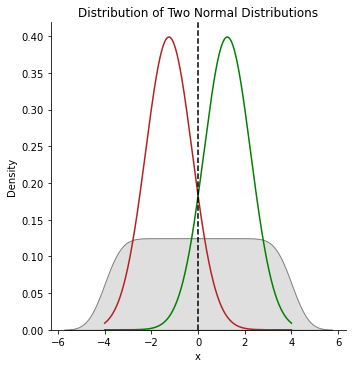

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings

warnings.filterwarnings('ignore')

# Create the data frame
df = pd.DataFrame({'x': np.linspace(-4, 4, 1000)})

# Plot the normal distributions
sns.displot(df, x='x', kind='kde', fill=True, color='gray')
sns.lineplot(df['x'], norm(-1.25, 1).pdf(df['x']), color='firebrick')
sns.lineplot(df['x'], norm(1.25, 1).pdf(df['x']), color='green')

# Add a vertical line at x=0
plt.axvline(x=0, linestyle='--', color='black')

# Set the title and labels
plt.title('Distribution of Two Normal Distributions')
plt.xlabel('x')
plt.ylabel('Density')

# Show the plot
plt.show()


Si en lugar de conocer la verdadera distribución poblacional de cada grupo solo se dispone de muestras, escenario que suele ocurrir en los casos reales, el límite de decisión LDA se aproxima al verdadero límite de decisión de Bayes pero no es exacto. Cuanto más representativas sean las muestras mejor la aproximación.

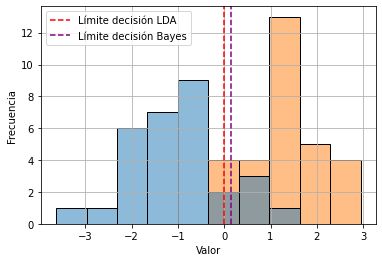

In [4]:

np.random.seed(6911)

grupo_a = np.random.normal(loc=-1.25, scale=1, size=30)
grupo_b = np.random.normal(loc=1.25, scale=1, size=30)

datos = np.concatenate([grupo_a, grupo_b])
grupos = np.repeat(["A", "B"], repeats=30)

datos_df = pd.DataFrame({'valor': datos, 'grupo': grupos})

sns.histplot(data=datos_df, x='valor', hue='grupo', bins=10, alpha=0.5)
plt.axvline(x=0, linestyle='--', color='red', label='Límite decisión LDA')
plt.axvline(x=(np.mean(grupo_a) + np.mean(grupo_b)) / 2, linestyle='--', color='purple', label='Límite decisión Bayes')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid()
plt.show()

## Condiciones de LDA

Las condiciones que se deben cumplir para que un Análisis Discriminante Lineal sea válido son:

1. Cada predictor que forma parte del modelo se distribuye de forma normal en cada una de las clases de la variable respuesta. En el caso de múltiples predictores, las observaciones siguen una distribución normal multivariante en todas las clases.

2. La varianza del predictor es igual en todas las clases de la variable respuesta. En el caso de múltiples predictores, la matriz de covarianza es igual en todas las clases. Si esto no se cumple se recurre a Análisis Discriminante Cuadrático (QDA).

Cuando la condición de normalidad no se cumple, el LDA pierde precisión pero aun así puede llegar a clasificaciones relativamente buenas .

Dos aproximaciones a LDA: Bayes y Fisher

Existen varios enfoques posibles para realizar un LDA. La aproximación descrita anteriormente está basada en el clasificador de Bayes, y utiliza todas las variables originales para calcular las probabilidades posteriores de que una observación pertenezca a cada grupo.

Antes de que el clasificador de Bayes fuese introducido en el LDA, Fisher propuso una aproximación en la que el espacio $p$-dimensional (donde $p $es el número de predictores originales) se reduce a un subespacio de menos dimensiones formado por las combinaciones lineales de los predictores que mejor explican la separación de las clases. Una vez encontradas dichas combinaciones se realiza la clasificación en este subespacio. Fisher definió como subespacio óptimo a aquel que maximiza la distancia entre grupos en términos de varianza. Los términos de discriminante lineal de Fisher y LDA son a menudo usados para expresar la misma idea, sin embargo, el artículo original de Fisher describe un discriminante ligeramente diferente, que no hace algunas de las suposiciones del LDA como la de una distribución normal de las clases o covarianzas iguales entre clases.

La aproximación de Fisher se puede ver como un proceso con dos partes:

1. Reducción de dimensionalidad: Se pasa de $p $variables predictoras originales a $k $combinaciones lineales de dichos predictores (variables discriminantes) que permiten explicar la separación de los grupos pero con menos dimensiones ($k < p$).

2. Clasificación de las observaciones empleando las variables discriminantes.

Los resultados de clasificación obtenidos mediante el método de Fisher son iguales a los obtenidos por el método de Bayes cuando:

- En el método de Bayes se asume que la matriz de covarianzas en igual en todos los grupos y se emplea como estimación la pooled within-class covariance matrix.
- En el método de Fisher, todos los discriminantes lineales se utilizan para la clasificación. El número máximo de discriminantes obtenido tras la reducción de dimensionalidad es número grupos-1 .

Precisión del LDA

Una vez que las normas de clasificación se han establecido, se tiene que evaluar cómo de buena es la clasificación resultante. En otras palabras, evaluar el porcentaje de aciertos en las clasificaciones.

Las matrices de confusión son una de las mejores formas de evaluar la capacidad de acierto que tiene un modelo LDA. Muestran el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. El método LDA busca los límites de decisión que más se aproximan al clasificador de Bayes, que por definición, tiene el menor ratio de error total de entre todos los clasificadores (si se cumple la condición de normalidad). Por lo tanto, el LDA intenta conseguir el menor número de clasificaciones erróneas posibles, pero no diferencia entre falsos positivos o falsos negativos. Si se quiere intentar reducir el número de errores de clasificación en una dirección determinada (por ejemplo, menos falsos negativos) se puede modificar el límite de decisión, aunque como consecuencia aumentará el número de falsos positivos.

Cuando para evaluar el error de clasificación se emplean las mismas observaciones con las que se ha creado el modelo, se obtiene lo que se denomina el training error. Si bien esta es una forma sencilla de estimar la precisión en la clasificación, tiende a ser excesivamente optimista. Es más adecuado evaluar el modelo empleando observaciones nuevas que el modelo no ha visto, obteniendo así el test error. En el capítulo Validación de modelos de regresión se describen diferentes estrategias para estimar el test error .

Ejemplo datos insectos

Un equipo de biólogos quiere generar un modelo estadístico que permita identificar a qué especie (A o B) pertenece un determinado insecto. Para ello se han medido tres variables (longitud de las patas, diámetro del abdomen y diámetro del órgano sexual) en 10 individuos de cada una de las dos especies.

Obtención de los datos de entrenamiento


In [5]:
from io import StringIO

# Datos en formato de texto
input_data = """
especie pata abdomen organo_sexual 
a 191 131 53
a 185 134 50
a 200 137 52
a 173 127 50
a 171 128 49
a 160 118 47
a 188 134 54
a 186 129 51
a 174 131 52
a 163 115 47
b 186 107 49
b 211 122 49
b 201 144 47
b 242 131 54
b 184 108 43
b 211 118 51
b 217 122 49
b 223 127 51
b 208 125 50
b 199 124 46
"""

# Leer los datos en un DataFrame
datos = pd.read_csv(StringIO(input_data), sep='\s+')

# Convertir la columna "especie" en un factor
datos['especie'] = pd.Categorical(datos['especie'])

datos

,especie,pata,abdomen,organo_sexual
0,a,191,131,53
1,a,185,134,50
2,a,200,137,52
3,a,173,127,50
4,a,171,128,49
5,a,160,118,47
6,a,188,134,54
7,a,186,129,51
8,a,174,131,52
9,a,163,115,47


### Exploración gráfica de los datos

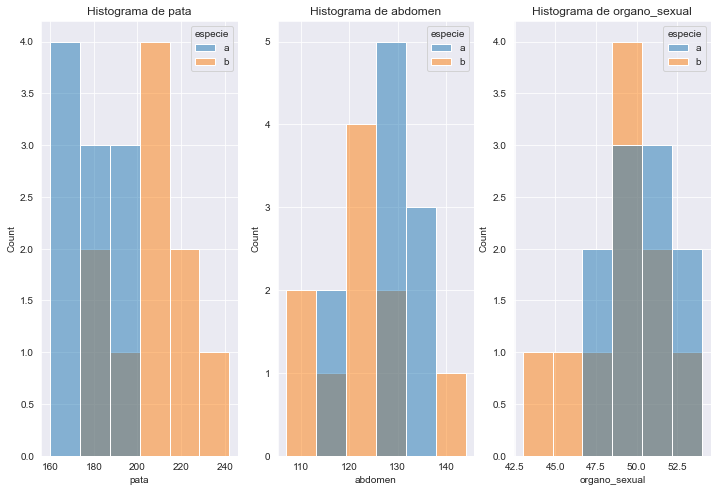

In [6]:



# Create the plots
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))

# Plot the pata histogram
plt.subplot(1, 3, 1)
sns.histplot(data=datos, x='pata', hue='especie', alpha=0.5)
plt.title('Histograma de pata')

# Plot the abdomen histogram
plt.subplot(1, 3, 2)
sns.histplot(data=datos, x='abdomen', hue='especie', alpha=0.5)
plt.title('Histograma de abdomen')

# Plot the organo_sexual histogram
plt.subplot(1, 3, 3)
sns.histplot(data=datos, x='organo_sexual', hue='especie', alpha=0.5)
plt.title('Histograma de organo_sexual')

plt.show()

A nivel individual, la longitud de la pata parece ser la variable que más se diferencia entre especies (menor solapamiento entre poblaciones).

<Figure size 864x576 with 0 Axes>

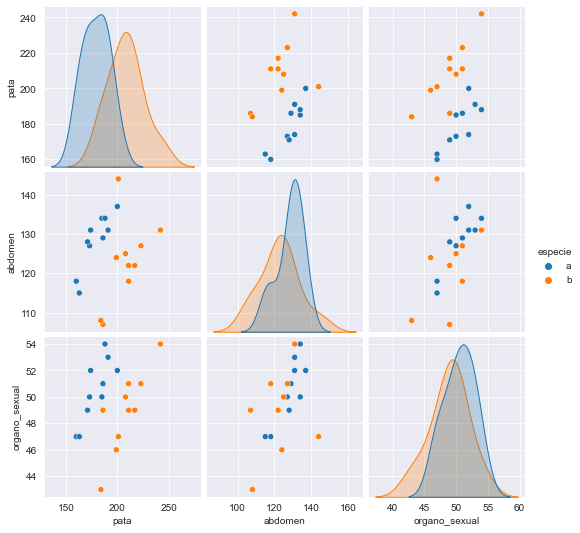

In [7]:
plt.figure(figsize=(12, 8))
# Change the data type of the especie column
datos['especie'] = pd.Categorical(datos['especie'])

sns.pairplot(datos, hue='especie')

plt.show()

El par de variables abdomen-pata y el par pata-organo_sexual parecen separar bien las dos especies.

## Prior probabilities

Como no se dispone de información sobre la abundancia relativa de las especies a nivel poblacional, se considera como probabilidad previa de cada especie el número de observaciones de la especie entre el número de observaciones totales.

$$\hat{\pi}^a = \hat{\pi}^b = \frac{10}{20} = 0.5$$

Homogeneidad de Varianza

De entre los diferentes test que contrastan la homogeneidad de varianza, el más recomendable cuando solo hay un predictor, dado que se asume que se distribuye de forma normal, es el test de Bartlett. Cuando se emplean múltiples predictores, se tiene que contrastar que la matriz de covarianzas (\(\Sigma\)) es constante en todos los grupos, siendo recomendable comprobar también la homogeneidad de varianza para cada predictor a nivel individual.

El test Box M fue desarrollado por el matemático Box (1949) como una extensión del test de Bartlett para escenarios multivariante y permite contrastar la igualdad de matrices entre grupos. El test Box M es muy sensible a violaciones de la normalidad multivariante, por lo que esta debe ser contrastada con anterioridad. Ocurre con frecuencia que el resultado de un test Box M resulta significativo debido a la falta de distribución normal multivariante en lugar de por falta de homogeneidad en las matrices de covarianza. Dada la sensibilidad de este test, se recomienda emplear un límite de significancia de 0.001 (Tabachnick & Fidell, 2001, y [real-statistics.com](http://www.real-statistics.com/multivariate-statistics/)).

Distribución de los predictores de forma individual:

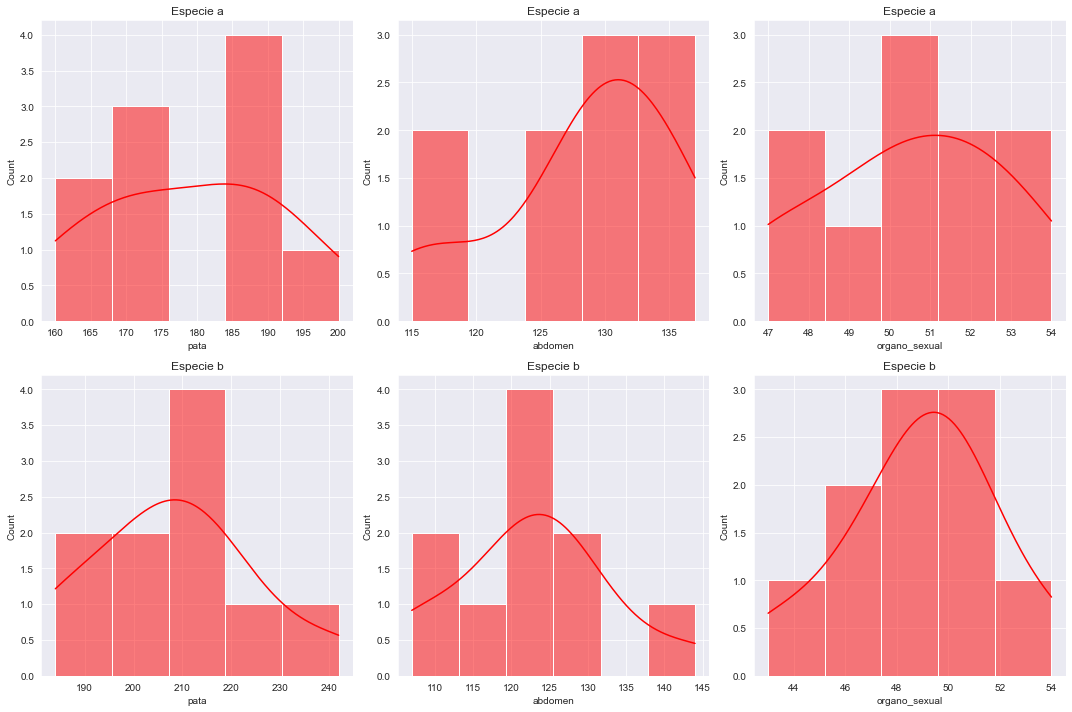

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Lista de variables predictoras
predictors = ["pata", "abdomen", "organo_sexual"]

# Loop para crear cada gráfico
for k, predictor in enumerate(predictors):
    for i, species in enumerate(["a", "b"]):
        x = datos[datos["especie"] == species][predictor]
        sns.histplot(x, kde=True, color='red', ax=axes[i, k])

        axes[i, k].set_title(f"Especie {species}")
        axes[i, k].set_xlabel(predictor)

plt.tight_layout()
plt.show()






In [9]:
import scipy.stats as stats
stats_df = pd.DataFrame()

# Itera sobre las especies
for species in datos['especie'].unique():

  # Itera sobre las variables
  for variable in datos.columns[range(1,4)]:

    # Obtén los datos para la especie y la variable actuales
    data_current = datos[datos['especie'] == species][variable]
    # Ejecuta la prueba Shapiro-Wilk
    shapiro_test = stats.shapiro(data_current)

    # Agrega los resultados de la prueba al DataFrame
    stats_df = stats_df.append({
      'especie': species,
      'variable': variable,
      'p_value': shapiro_test.pvalue
    }, ignore_index=True)

# Imprime los resultados
print(stats_df)

  especie       variable   p_value
0       a           pata  0.776305
1       a        abdomen  0.184535
2       a  organo_sexual  0.643086
3       b           pata  0.798571
4       b        abdomen  0.553822
5       b  organo_sexual  0.821787


No hay evidencias de falta de normalidad univariante en ninguna de las variables empleadas como predictores en ninguno de los grupos.


#### Estimación de los parámetros de la función de densidad $(\hat{μ}(X),∑)$ y cálculo de la función discriminante.


Estos dos pasos se realizan mediante la función lda del paquete MASS. lda realiza la clasificación mediante la aproximación de Fisher.

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

modelo_lda = LinearDiscriminantAnalysis()
modelo_lda.fit(datos[['pata', 'abdomen', 'organo_sexual']], datos['especie'])

LinearDiscriminantAnalysis()

Una vez obtenidas las funciones discriminantes, se puede clasificar un nuevo insecto en función de sus medidas. Por ejemplo, un nuevo espécimen cuyas medidas sean: pata = 194, abdomen = 124, organo_sexual = 49.

In [11]:
nuevas_observaciones = pd.DataFrame({
    'pata': [194],
    'abdomen': [124],
    'organo_sexual': [49]
})

prediccion = modelo_lda.predict(nuevas_observaciones)
prediccion

array(['b'], dtype='<U1')

#### Evaluación de los errores de clasificación.

In [12]:

# Realizar las predicciones para el conjunto de datos de entrenamiento
predicciones = modelo_lda.predict(datos[['pata', 'abdomen', 'organo_sexual']])

# Crear tabla de contingencia para comparar clases reales con clases predichas
tabla_contingencia = pd.crosstab(datos['especie'], predicciones, rownames=['Clase real'], colnames=['Clase predicha'])

print(tabla_contingencia)

Clase predicha   a   b
Clase real            
a               10   0
b                0  10


In [13]:
# Calcular el training error
trainig_error = np.mean(datos['especie'] != predicciones) * 100

# Mostrar el resultado
print("trainig_error =", trainig_error, "%")

trainig_error = 0.0 %


Empleando las mismas observaciones con las que se ha generado el modelo discriminante (trainig data), la precisión de clasificación es del 100%. Evaluar un modelo con los mismos datos con los que se ha creado suele resultar en estimaciones de la precisión demasiado optimistas (training error muy bajo). Como se describe en el capítulo Validación de modelos de regresión, la estimación del test error mediante validación cruzada es más adecuada para obtener una evaluación realista del modelo.

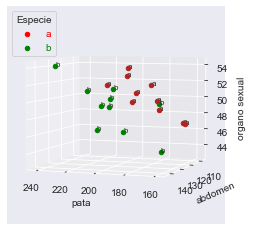

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y el gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Datos del gráfico
pata = datos['pata']
abdomen = datos['abdomen']
organo_sexual = datos['organo_sexual']
especie = datos['especie']

# Colores para cada especie
colors = {'a': 'firebrick', 'b': 'green'}

# Gráfico de dispersión 3D
for i in range(len(pata)):
    ax.scatter(pata[i], abdomen[i], organo_sexual[i], c=colors[especie[i]], marker='o')

# Etiquetas de las especies
for (x, y, z, label) in zip(pata, abdomen, organo_sexual, especie):
    ax.text(x, y, z, label, fontsize=8)

# Etiquetas de los ejes
ax.set_xlabel('pata')
ax.set_ylabel('abdomen')
ax.set_zlabel('organo sexual')

# Mostrar leyenda
leg=ax.legend(labels=['a', 'b'], title='Especie', loc='upper left', labelcolor  =['red','green'])
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('green')
# Ajustar el ángulo de visualización
ax.view_init(elev=5, azim=110)

# Mostrar el gráfico
plt.show()


### Ejemplo con Iris data


El set de datos Iris contiene métricas de 150 flores de 3 especies diferentes de planta Iris. Para cada flor se han registrado 4 variables: sepal length, sepal width, petal length y petal width, todas ellas en centímetros. Se desea generar un modelo discriminante que permita clasificar las flores en las distintas especies empleando las variables mencionadas.

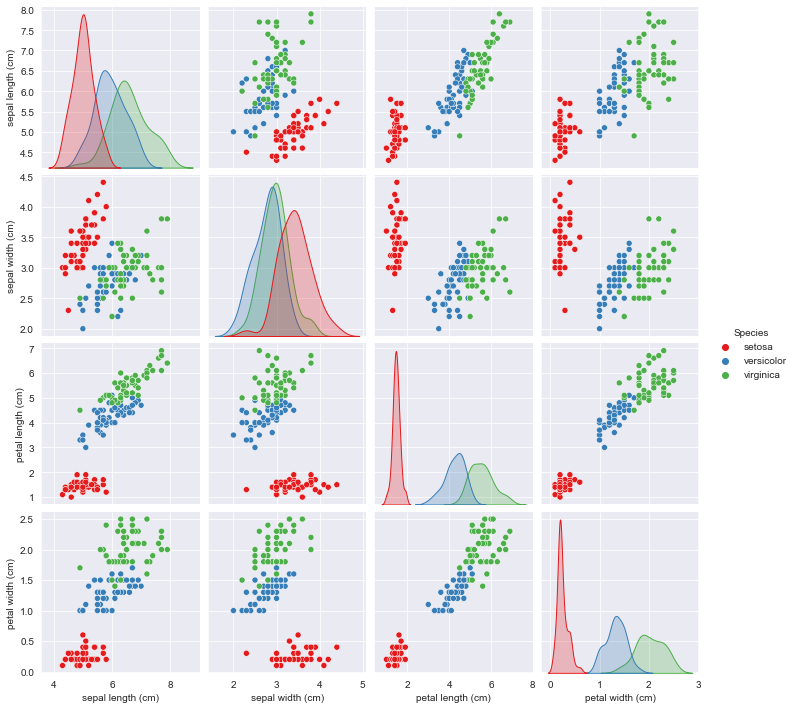

In [15]:
from sklearn.datasets import load_iris

# Cargar el conjunto de datos iris
iris = load_iris()
data = iris.data
target = iris.target

# Convertir el conjunto de datos en un DataFrame de pandas

iris_df = pd.DataFrame(data, columns=iris.feature_names)
iris_df['Species'] = iris.target_names[target]

sns.pairplot(iris_df, hue='Species', palette='Set1')

plt.show()

Las variables Petal.Lenght y Petal.Width son las dos variables con más potencial para poder separar entre clases. Sin embargo, están altamente correlacionadas, por lo que la información que aportan es en gran medida redundante.

#### Prior probabilities


Como no se dispone de información sobre la abundancia relativa de las especies a nivel poblacional, se considera como probabilidad previa de cada especie el número de observaciones de la especie entre el número de observaciones totales.

$$π^setosa=π^versicolor=π^virginica=50150=0.33$$



Normalidad univariante, normalidad multivariante y homogeneidad de varianza


Distribución de los predictores de forma individual:

In [16]:
# Itera sobre las especies
stats_df2 = pd.DataFrame()
for Species in iris_df['Species'].unique():

  # Itera sobre las variables
  for variable in iris_df.columns[range(0,4)]:

    # Obtén los datos para la especie y la variable actuales
    data_current = iris_df[iris_df['Species'] == Species][variable]
    # Ejecuta la prueba Shapiro-Wilk
    shapiro_test2 = stats.shapiro(data_current)

    # Agrega los resultados de la prueba al DataFrame
    stats_df2 = stats_df2.append({
      'especie': Species,
      'variable': variable,
      'p_value': shapiro_test2.pvalue
    }, ignore_index=True)

# Imprime los resultados
(stats_df2)

,especie,variable,p_value
0,setosa,sepal length (cm),4.595011e-01
1,setosa,sepal width (cm),2.715127e-01
2,setosa,petal length (cm),5.481128e-02
3,setosa,petal width (cm),8.658606e-07
4,versicolor,sepal length (cm),4.647379e-01
5,versicolor,sepal width (cm),3.379844e-01
6,versicolor,petal length (cm),1.584763e-01
7,versicolor,petal width (cm),2.727822e-02
8,virginica,sepal length (cm),2.583135e-01
9,virginica,sepal width (cm),1.808987e-01


Normalidad multivariante:

In [17]:
import pingouin as pg
# Calculate the Mahalanobis distances
# Realizar la prueba de normalidad multivariante

royston_test = pg.multivariate_normality(iris_df.drop('Species',axis=1), alpha=0.05)

# Imprimir los resultados de la prueba
print(royston_test)

HZResults(hz=2.336394200315434, pval=4.1413116299285044e-19, normal=False)


Ambos test muestran evidencias significativas de falta de normalidad multivariante. El LDA tiene cierta robustez frente a la falta de normalidad multivariante, pero es importante tenerlo en cuenta en la conclusión del análisis.

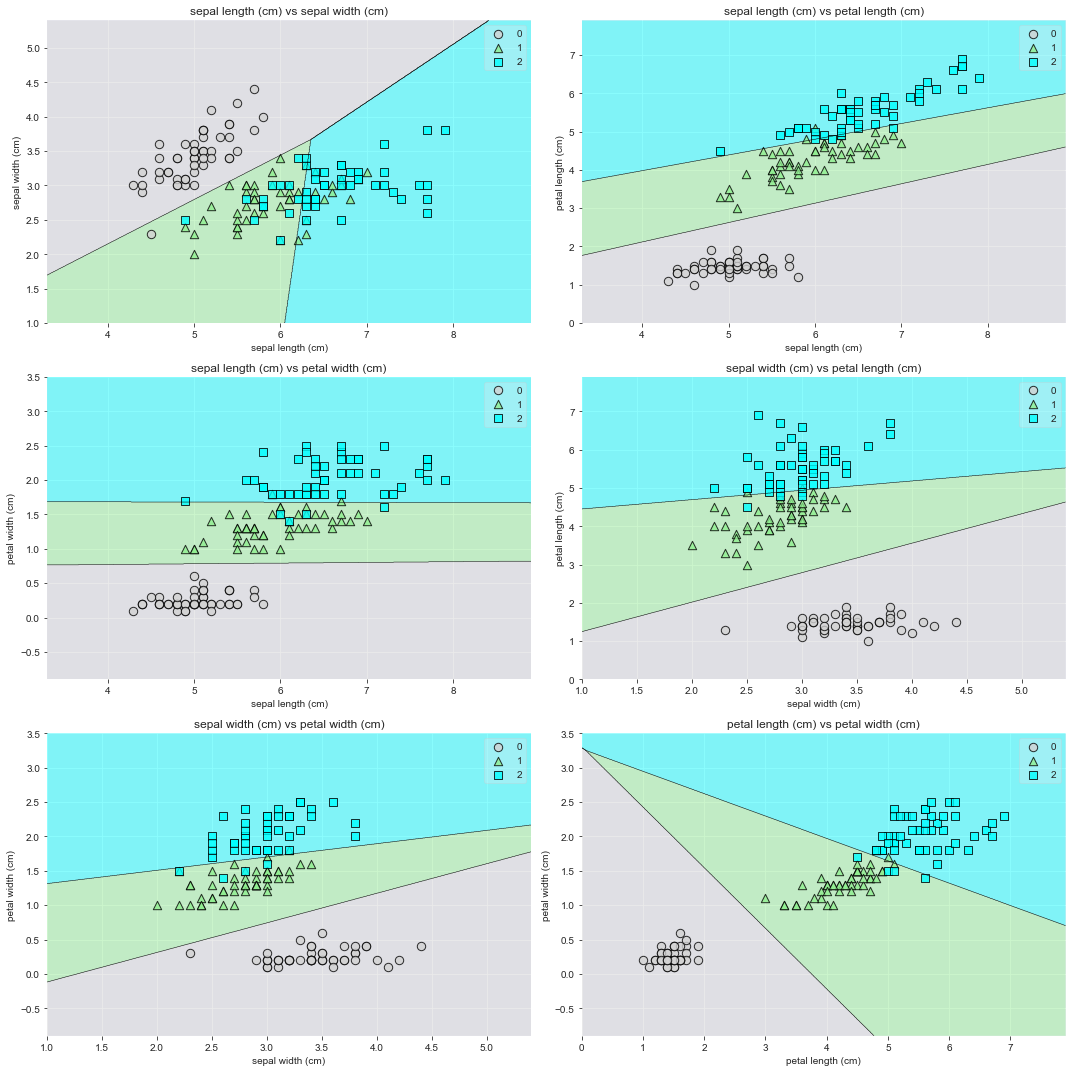

In [21]:
from sklearn import datasets
import itertools
from mlxtend.plotting import plot_decision_regions

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Get feature names
feature_names = iris.feature_names

# Create all possible combinations of two features
feature_combinations = list(itertools.combinations(range(len(feature_names)), 2))

# Plot decision regions for each feature combination
plt.figure(figsize=(15, 15))
for idx, (i, j) in enumerate(feature_combinations, 1):
    plt.subplot(3, 2, idx)
    X_subset = X[:, [i, j]]
    lda.fit(X_subset, y)
    plot_decision_regions(X_subset, y, clf=lda, colors='lightgrey,lightgreen,cyan', markers='o^s', 
                          scatter_kwargs={'s': 70, 'linewidths': 1, 'edgecolors': 'black'})
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title(f'{feature_names[i]} vs {feature_names[j]}')

plt.tight_layout()
plt.show()


### Evaluación de los errores de clasificación

In [24]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
predicted_classes = lda.predict(X)

# Crear un DataFrame con las clases reales y las clases predichas
predictions_df = pd.DataFrame({
    "Clase real": target,
    "Clase predicha": predicted_classes
})

# Crear la tabla de contingencia
table = pd.crosstab(predictions_df["Clase real"], predictions_df["Clase predicha"], rownames=["Clase real"], colnames=["Clase predicha"])

# Imprimir la tabla de contingencia
print(table)

Clase predicha   0   1   2
Clase real                
0               50   0   0
1                0  48   2
2                0   1  49


In [25]:
from sklearn.metrics import accuracy_score

# Calcular el error de entrenamiento
training_error = 100 * (1 - accuracy_score(target, predicted_classes))

# Imprimir el resultado
print("training_error =", training_error, "%")

training_error = 2.0000000000000018 %


## Análisis Discriminante Cuadrático (QDA)

###Idea intuitiva

El clasificador cuadrático, o Quadratic Discriminant Analysis (QDA), se asemeja en gran medida al LDA, con la única diferencia de que el QDA considera que cada clase k tiene su propia matriz de covarianza (∑k) y, como consecuencia, la función discriminante toma forma cuadrática:

$$ \log(P(Y=k|X=x)) = -\frac{1}{2} \log|\Sigma_k| - \frac{1}{2} (x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k) + \log(\pi_k) $$

Para poder calcular la probabilidad posterior a partir de esta ecuación discriminante, es necesario estimar, para cada clase, (∑k), μk, y πk a partir de la muestra. Cada nueva observación se clasifica en aquella clase para la que el valor de la probabilidad posterior sea mayor.

El QDA genera límites de decisión curvos, por lo que puede aplicarse a situaciones en las que la separación entre grupos no es lineal.

### Ejemplo QDA billetes falsos


Se pretende generar un modelo discriminante que permita diferenciar entre billetes verdaderos y falsos. Se han registrado múltiples variables para 100 billetes verdaderos y 100 billetes falsos:

Status: si es verdadero (genuine) o falso (counterfeit).
Length: longitud (mm)
Left: Anchura del borde izquierdo (mm)
Right: Anchura del borde derecho (mm)
Bottom: Anchura del borde inferior (mm)
Top: Anchura del borde superior (mm)
Diagonal: longitud diagonal (mm)

La proporción de billetes falsos en circulación es mucho menor que la de billetes verdaderos, por lo tanto, a pesar de que en la muestra se dispone de la misma cantidad de billetes de cada clase, no es conveniente considerar que las probabilidades previas son iguales. En este tipo de escenario se suele recurrir a estudios previos o muestras piloto que permitan estimar las proporciones poblacionales de cada clase. En nuestro caso se va a suponer que solo el 1% de los billetes en circulación son falsos.
$$ \pi^\text{verdadero} = 0.99 \quad \pi^\text{falso} = 0.01 $$

In [26]:
banknote=pd.read_csv("https://raw.githubusercontent.com/jazaineam1/Diplomado_ucentral_ME/main/Datos/Datos-banco.csv",sep=';',decimal=',').drop('Unnamed: 0',axis=1)
banknote

,Status,Length,Left,Right,Bottom,Top,Diagonal
0,genuine,214.8,131.0,131.1,9.0,9.7,141.0
1,genuine,214.6,129.7,129.7,8.1,9.5,141.7
2,genuine,214.8,129.7,129.7,8.7,9.6,142.2
3,genuine,214.8,129.7,129.6,7.5,10.4,142.0
4,genuine,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...,...
195,counterfeit,215.0,130.4,130.3,9.9,12.1,139.6
196,counterfeit,215.1,130.3,129.9,10.3,11.5,139.7
197,counterfeit,214.8,130.3,130.4,10.6,11.1,140.0
198,counterfeit,214.7,130.7,130.8,11.2,11.2,139.4


In [27]:
banknote['Status'].value_counts()

genuine        100
counterfeit    100
Name: Status, dtype: int64

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Suponiendo que tienes tus datos en el DataFrame 'banknote'
X = banknote.drop('Status', axis=1)  # Variables predictoras
y = banknote['Status']              # Variable de respuesta

# Definir el modelo QDA con las probabilidades previas
modelo_qda = QuadraticDiscriminantAnalysis(priors=[0.01, 0.99])

# Ajustar el modelo a los datos
modelo_qda.fit(X, y)

# Imprimir el modelo ajustado
print(modelo_qda)

QuadraticDiscriminantAnalysis(priors=array([0.01, 0.99]))


In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd

# Suponiendo que tienes tus datos en el DataFrame 'banknote'
X = banknote.drop('Status', axis=1)  # Variables predictoras

# Hacer predicciones utilizando el modelo QDA ajustado
predicciones = modelo_qda.predict(X)

# Crear un DataFrame para las predicciones y la variable de respuesta real
resultados = pd.DataFrame({'Clase real': banknote['Status'], 'Clase predicha': predicciones})

# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(resultados['Clase real'], resultados['Clase predicha'], 
                                 rownames=['Clase real'], colnames=['Clase predicha'])

# Imprimir la tabla de contingencia
print(tabla_contingencia)


Clase predicha  counterfeit  genuine
Clase real                          
counterfeit              99        1
genuine                   0      100


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Obtener la matriz de confusión
matriz_confusion = confusion_matrix(banknote['Status'], predicciones)

# Obtener las métricas de clasificación
reporte_clasificacion = classification_report(banknote['Status'], predicciones)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(matriz_confusion)

# Imprimir las métricas de clasificación
print("\nReporte de clasificación:")
print(reporte_clasificacion)


Matriz de confusión:
[[ 99   1]
 [  0 100]]

Reporte de clasificación:
              precision    recall  f1-score   support

 counterfeit       1.00      0.99      0.99       100
     genuine       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



revisa [aquí]('https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/) para cada una de estas metricas 

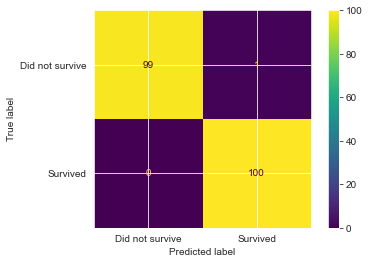

In [31]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(estimator=modelo_qda,
                      X=X,
                      y_true=banknote['Status'],
                      display_labels=["Did not survive", "Survived"])


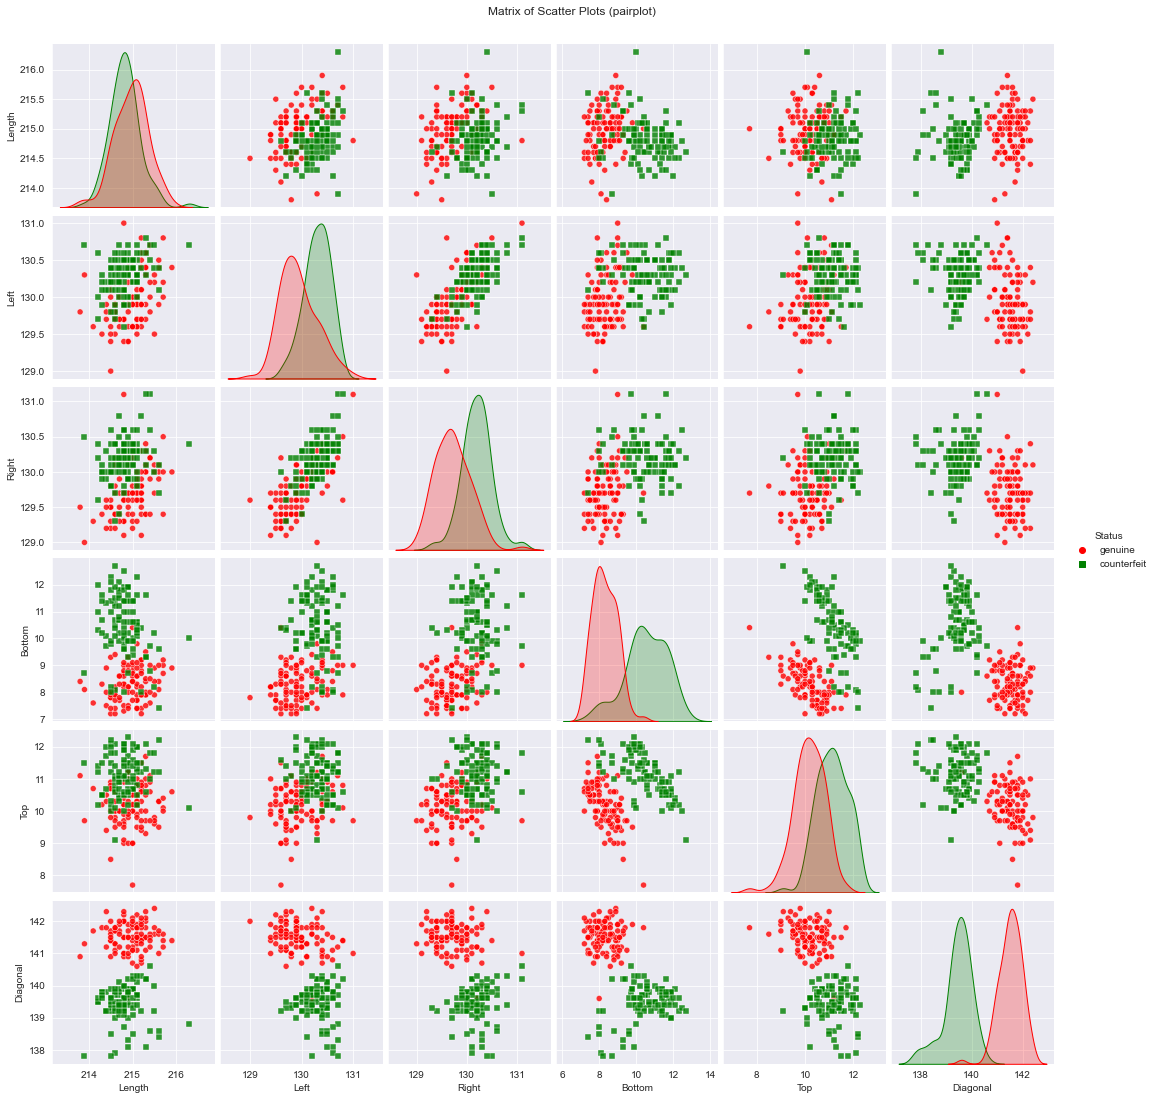

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the 'banknote' DataFrame

# Set the 'Status' column as the target variable (0 or 1)
y = banknote['Status']

# Drop the 'Status' column to get the features
X = banknote.drop('Status', axis=1)

# Combine the features and target variable into one DataFrame
banknote_df = pd.concat([X, y], axis=1)

# Create the scatter matrix with colored data points
sns.pairplot(banknote_df, hue='Status', palette=['red', 'green'], 
             markers=['o', 's'], diag_kind='auto', plot_kws={'alpha': 0.8})

# Set the title for the plot
plt.suptitle("Matrix of Scatter Plots (pairplot)", y=1.02)

# Show the plot
plt.show()
